In [30]:
import acquire_zillow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = acquire_zillow.get_new_zillow_data()
df = raw_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedroom      52441 non-null  float64
 1   bathroom     52441 non-null  float64
 2   square_ft    52359 non-null  float64
 3   yearbuilt    52325 non-null  float64
 4   fips         52441 non-null  float64
 5   house_value  52440 non-null  float64
 6   tax          52437 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


In [3]:
df.head()

,bedroom,bathroom,square_ft,yearbuilt,fips,house_value,tax
0,4.0,3.5,3100.0,1998.0,6059.0,1023282.0,11013.72
1,2.0,1.0,1465.0,1967.0,6111.0,464000.0,5672.48
2,3.0,2.0,1243.0,1962.0,6059.0,564778.0,6488.30
3,4.0,3.0,2376.0,1970.0,6037.0,145143.0,1777.51
4,4.0,3.0,2962.0,1950.0,6037.0,773303.0,9516.26


##  Data clean up

### handle missing values

In [4]:
# find out the null values

df.isnull().sum()

bedroom          0
bathroom         0
square_ft       82
yearbuilt      116
fips             0
house_value      1
tax              4
dtype: int64

In [5]:
(82+116+1+4)/52441

0.0038710169523845845

In [6]:
# since the null value is only 0.4%, so I will just drop those rows.

df = df.dropna()
df.shape

(52315, 7)

In [7]:
# check null again

df.isnull().sum()

bedroom        0
bathroom       0
square_ft      0
yearbuilt      0
fips           0
house_value    0
tax            0
dtype: int64

### convert data type

In [8]:
# 100% of columns can be converted to int w/o data loss
(df.square_ft == df.square_ft.astype(int)).mean()

1.0

In [9]:
(df.bedroom == df.bedroom.astype(int)).mean()

1.0

In [10]:
(df.bathroom == df.bathroom.astype(int)).mean()

0.8727898308324572

In [11]:
# convert bedroom yearbuilt, square_ft and fips into int

df[['bedroom', 'square_ft','yearbuilt', 'fips']] = df[['bedroom', 'square_ft','yearbuilt', 'fips']].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52315 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedroom      52315 non-null  int64  
 1   bathroom     52315 non-null  float64
 2   square_ft    52315 non-null  int64  
 3   yearbuilt    52315 non-null  int64  
 4   fips         52315 non-null  int64  
 5   house_value  52315 non-null  float64
 6   tax          52315 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.2 MB


### handling outlies, here I want to focus on the majority of data

In [13]:
df.bedroom.value_counts()

3     23346
4     15226
2      8333
5      3970
6       633
1       605
7       106
0        57
8        24
9         8
12        3
10        2
14        1
11        1
Name: bedroom, dtype: int64

In [14]:
df[df.bedroom <= 6].shape[0] / df.shape[0]

0.9972283283952977

In [15]:
df.bathroom.value_counts()

2.0     21887
3.0     10664
1.0      9552
2.5      3931
4.0      2227
3.5       913
1.5       840
5.0       803
4.5       682
6.0       322
5.5       224
7.0        88
8.0        53
6.5        47
0.0        41
7.5        16
9.0        13
10.0        5
11.0        3
8.5         2
18.0        1
13.0        1
Name: bathroom, dtype: int64

In [16]:
df[df.bathroom <= 6].shape[0] / df.shape[0]

0.9956226703622288

In [17]:
df[df.house_value < 2000000].shape[0] / df.shape[0]

0.9737360221733729

In [18]:
df.shape

(52315, 7)

In [19]:
# set up the cutt off line for the data, drop the outlies: square_ft > 6000, bathroom > 6 and bedroom > 6

df = df[df.bedroom <= 6]

df = df[df.bathroom <= 6]

df = df[df.house_value < 2000000]

In [33]:
df.shape

(50789, 7)

In [34]:
df.head()

,bedroom,bathroom,square_ft,yearbuilt,fips,house_value,tax
0,4,3.5,3100,1998,6059,1023282.0,11013.72
1,2,1.0,1465,1967,6111,464000.0,5672.48
2,3,2.0,1243,1962,6059,564778.0,6488.30
3,4,3.0,2376,1970,6037,145143.0,1777.51
4,4,3.0,2962,1950,6037,773303.0,9516.26


bedroom


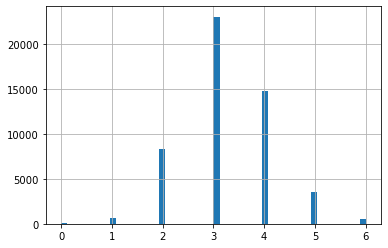

bathroom


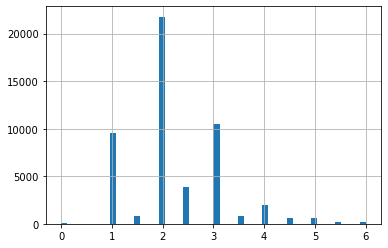

square_ft


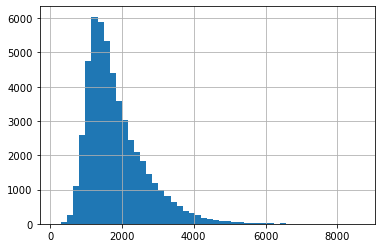

yearbuilt


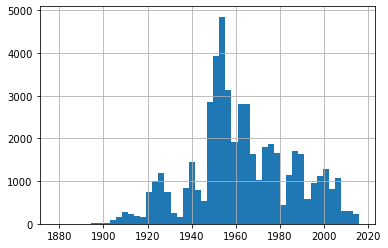

fips


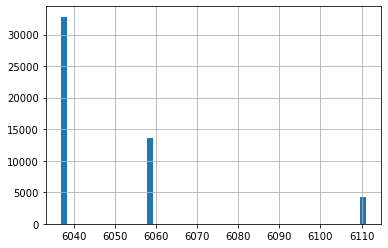

house_value


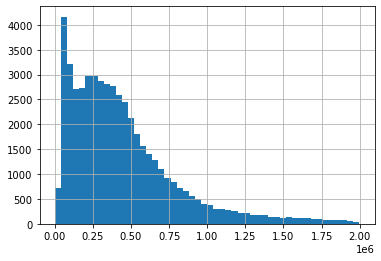

tax


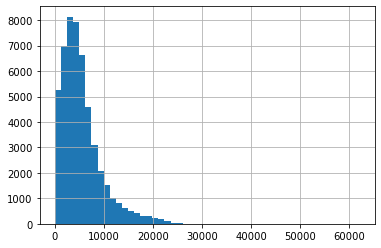

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    print(col)
    df[col].hist(bins=50)
    plt.show()

In [57]:
# ceate a function to combine all the data clean up steps

def clean_zillow(df):
    df = df.dropna()
    df[['bedroom', 'square_ft','yearbuilt', 'fips']] = df[['bedroom', 'square_ft','yearbuilt', 'fips']].astype('int')
    
    df = df[df.bedroom <= 6]
    df = df[df.bathroom <= 6]
    df = df[df.house_value < 2000000]
    
    return df

## split data

In [58]:
# split data into train 56%, validate 24% and test 20%

train_and_validate, test = train_test_split(df, test_size=0.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=0.3, random_state=123)

print(train.shape)
print(validate.shape)
print(test.shape)

(28441, 7)
(12190, 7)
(10158, 7)


In [72]:
# write a function of splitting zillow data

def split_zillow(df):
    
    train_and_validate, test = train_test_split(df, test_size=0.2, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=0.3, random_state=123)
    
    return train, validate, test

In [77]:
# function of preparing zillow data that include clean data and split data

def prep_zillow(df):
    df = clean_zillow(df)
    train, validate, test = split_zillow(df)
    
    return train, validate, test